In [2]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [38]:
MET_res = "/home/cap/Downloads/MET/results/dump_row_file.txt" #data dumped by stat_analysis 

df =  pd.read_csv(MET_res,sep=r'\s+')
#df    

In [39]:
df.columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [40]:

df[['FCST_LEAD', 'FCST_VALID_BEG','FSS','FCST_THRESH','OBS_THRESH',"FSS", 'INTERP_PNTS']]

,FCST_LEAD,FCST_VALID_BEG,FSS,FCST_THRESH,OBS_THRESH,FSS,INTERP_PNTS
0,0,20250415_000000,0.00000,>=1.0,>=1.0,0.00000,1
1,0,20250415_000000,0.00000,>=2.0,>=2.0,0.00000,1
2,0,20250415_000000,0.00000,>=5.0,>=5.0,0.00000,1
3,0,20250415_000000,0.00000,>=10.0,>=10.0,0.00000,1
4,0,20250415_000000,0.00000,>=1.0,>=1.0,0.00000,9
...,...,...,...,...,...,...,...
395,230000,20250416_230000,0.13305,>=10.0,>=10.0,0.13305,25
396,230000,20250416_230000,0.41409,>=1.0,>=1.0,0.41409,49
397,230000,20250416_230000,0.33081,>=2.0,>=2.0,0.33081,49
398,230000,20250416_230000,0.25572,>=5.0,>=5.0,0.25572,49


In [41]:
# add datetime column
df["FCST_VALID_BEG"]=[datetime.strptime(t,"%Y%m%d_%H%M%S") for t in df["FCST_VALID_BEG"]]
df["FCST_VALID_END"]=[datetime.strptime(t,"%Y%m%d_%H%M%S") for t in df["FCST_VALID_END"]]
df["OBS_VALID_BEG"]=[datetime.strptime(t,"%Y%m%d_%H%M%S") for t in df["OBS_VALID_BEG"]]
df["OBS_VALID_END"]=[datetime.strptime(t,"%Y%m%d_%H%M%S") for t in df["OBS_VALID_END"]]
df["OBS_THRESH"] = [float(ob.replace(">=","")) for ob in df["OBS_THRESH"]]
df["FCST_THRESH"] = [float(ob.replace(">=","")) for ob in df["FCST_THRESH"]]
df["FCST_LEAD"] = [int(t/1e4) for t in df["FCST_LEAD"]]

In [42]:
results = df.copy()
#df = df[df["FCST_VALID_BEG"] >= datetime(2025,4,16,0)]

In [43]:
results

,VERSION,MODEL,DESC,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,FCST_VAR,...,AFSS_BCU,UFSS,UFSS_BCL,UFSS_BCU,F_RATE,F_RATE_BCL,F_RATE_BCU,O_RATE,O_RATE_BCL,O_RATE_BCU
0,V11.1.0,Harmonie,NaN,0,2025-04-15 00:00:00,2025-04-15 00:00:00,0,2025-04-16 00:00:00,2025-04-16 00:00:00,TPRATE,...,NaN,0.64882,NaN,NaN,0.00000,NaN,NaN,0.29763,NaN,NaN
1,V11.1.0,Harmonie,NaN,0,2025-04-15 00:00:00,2025-04-15 00:00:00,0,2025-04-16 00:00:00,2025-04-16 00:00:00,TPRATE,...,NaN,0.64871,NaN,NaN,0.00000,NaN,NaN,0.29743,NaN,NaN
2,V11.1.0,Harmonie,NaN,0,2025-04-15 00:00:00,2025-04-15 00:00:00,0,2025-04-16 00:00:00,2025-04-16 00:00:00,TPRATE,...,NaN,0.64871,NaN,NaN,0.00000,NaN,NaN,0.29743,NaN,NaN
3,V11.1.0,Harmonie,NaN,0,2025-04-15 00:00:00,2025-04-15 00:00:00,0,2025-04-16 00:00:00,2025-04-16 00:00:00,TPRATE,...,NaN,0.64871,NaN,NaN,0.00000,NaN,NaN,0.29743,NaN,NaN
4,V11.1.0,Harmonie,NaN,0,2025-04-15 00:00:00,2025-04-15 00:00:00,0,2025-04-16 00:00:00,2025-04-16 00:00:00,TPRATE,...,NaN,0.64986,NaN,NaN,0.00000,NaN,NaN,0.29973,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,V11.1.0,Harmonie,NaN,23,2025-04-16 23:00:00,2025-04-16 23:00:00,0,2025-04-16 23:00:00,2025-04-16 23:00:00,TPRATE,...,NaN,0.65079,NaN,NaN,0.10217,NaN,NaN,0.30159,NaN,NaN
396,V11.1.0,Harmonie,NaN,23,2025-04-16 23:00:00,2025-04-16 23:00:00,0,2025-04-16 23:00:00,2025-04-16 23:00:00,TPRATE,...,NaN,0.65842,NaN,NaN,0.46401,NaN,NaN,0.31683,NaN,NaN
397,V11.1.0,Harmonie,NaN,23,2025-04-16 23:00:00,2025-04-16 23:00:00,0,2025-04-16 23:00:00,2025-04-16 23:00:00,TPRATE,...,NaN,0.65397,NaN,NaN,0.33692,NaN,NaN,0.30794,NaN,NaN
398,V11.1.0,Harmonie,NaN,23,2025-04-16 23:00:00,2025-04-16 23:00:00,0,2025-04-16 23:00:00,2025-04-16 23:00:00,TPRATE,...,NaN,0.65203,NaN,NaN,0.20327,NaN,NaN,0.30406,NaN,NaN


In [7]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
check_date="20160901"
pod_cols = [col for col in results[check_date].columns if "POD" in col]
pof_cols = [col for col in results[check_date].columns if "POF" in col]
#acc_cols = [col for col in results["20160510"].columns if "ACC" in col]
fss_cols = [col for col in results[check_date].columns if "FSS" in col]
acc_cols = [col for col in results[check_date].columns if "ANOM_CORR" in col]

In [8]:
pod_cols

['PODY',
 'PODY_NCL',
 'PODY_NCU',
 'PODY_BCL',
 'PODY_BCU',
 'PODN',
 'PODN_NCL',
 'PODN_NCU',
 'PODN_BCL',
 'PODN_BCU']

In [9]:
pof_cols

['POFD', 'POFD_NCL', 'POFD_NCU', 'POFD_BCL', 'POFD_BCU']

In [10]:
acc_cols

[]

In [11]:
fss_cols

[]

In [12]:
results[check_date][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20160901_060000,20160901_060000,0,20160901_060000,20160901_060000,0.90722,FULL


In [13]:
results[check_date]["VX_MASK"]

0    FULL
Name: VX_MASK, dtype: object

### Collect the values for all dates and take the PODY


In [14]:
REGION = "FULL"

hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

### find fraction skill score

In [15]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [16]:
fss_files.keys()

odict_keys(['20160925', '20160929', '20160930', '20160919', '20160926', '20160917', '20160928', '20160908', '20160920', '20160923', '20160927', '20160904', '20160913', '20160902', '20160915', '20160916', '20160903', '20160906', '20160901', '20160907', '20160918', '20160910', '20160914', '20160924', '20160922', '20160921', '20160909', '20160905', '20160911', '20160912'])

In [17]:
# other columns
fss_files[check_date].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [18]:
fss_files[check_date][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.74704,0,20160901_060000,20160901_060000
1,FULL,9,0.83805,0,20160901_060000,20160901_060000
2,FULL,25,0.86478,0,20160901_060000,20160901_060000
3,FULL,49,0.87830,0,20160901_060000,20160901_060000


In [19]:
fss_cols = [col for col in fss_files[check_date].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [20]:
fss_files[check_date][["FSS"]]

,FSS
0,0.74704
1,0.83805
2,0.86478
3,0.87830


### Plot the FSS for a given domain

In [21]:
date_sel = check_date
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
get_fss_nor_scan = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "NOR_SCAN"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [22]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.74704,0,20160901_060000,20160901_060000
1,9,0.83805,0,20160901_060000,20160901_060000
2,25,0.86478,0,20160901_060000,20160901_060000
3,49,0.87830,0,20160901_060000,20160901_060000


In [23]:
fss_nor_scan = get_fss_nor_scan[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
fss_nor_scan

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END


In [24]:
for _,r in fss_all.iterrows():
    print(r["FSS"])

0.74704
0.83805
0.86478
0.8783


In [25]:
df_fss_full = pd.DataFrame(columns=["date","points","fss"])
df_fss_nor_scan = pd.DataFrame(columns=["date","points","fss"])


In [26]:
for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "FULL"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)

for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "NOR_SCAN"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_nor_scan=pd.concat([df_fss_nor_scan,data_row],ignore_index=True)

/tmp/ipykernel_133625/3059115965.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)


In [27]:
df_fss_full.dtypes

date      datetime64[ns]
points            object
fss              float64
dtype: object

In [28]:
df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')

In [29]:
df_fss_full

,date,points,fss,day
0,2016-09-25 06:00:00,1,0.58681,2016-09-25
1,2016-09-25 06:00:00,9,0.67527,2016-09-25
2,2016-09-25 06:00:00,25,0.69901,2016-09-25
3,2016-09-25 06:00:00,49,0.71194,2016-09-25
4,2016-09-29 06:00:00,1,0.35646,2016-09-29
...,...,...,...,...
115,2016-09-11 06:00:00,49,0.70146,2016-09-11
116,2016-09-12 06:00:00,1,0.56600,2016-09-12
117,2016-09-12 06:00:00,9,0.64638,2016-09-12
118,2016-09-12 06:00:00,25,0.66982,2016-09-12


In [30]:
#df_fss_nor_scan["day"] = df_fss_nor_scan["date"].dt.strftime('%Y-%m-%d')
pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [31]:
#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [32]:
from matplotlib.colors import LinearSegmentedColormap


# Create custom colormap (red to green)
colors = ['red', 'green']
n_bins = 10  # Number of color gradients
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

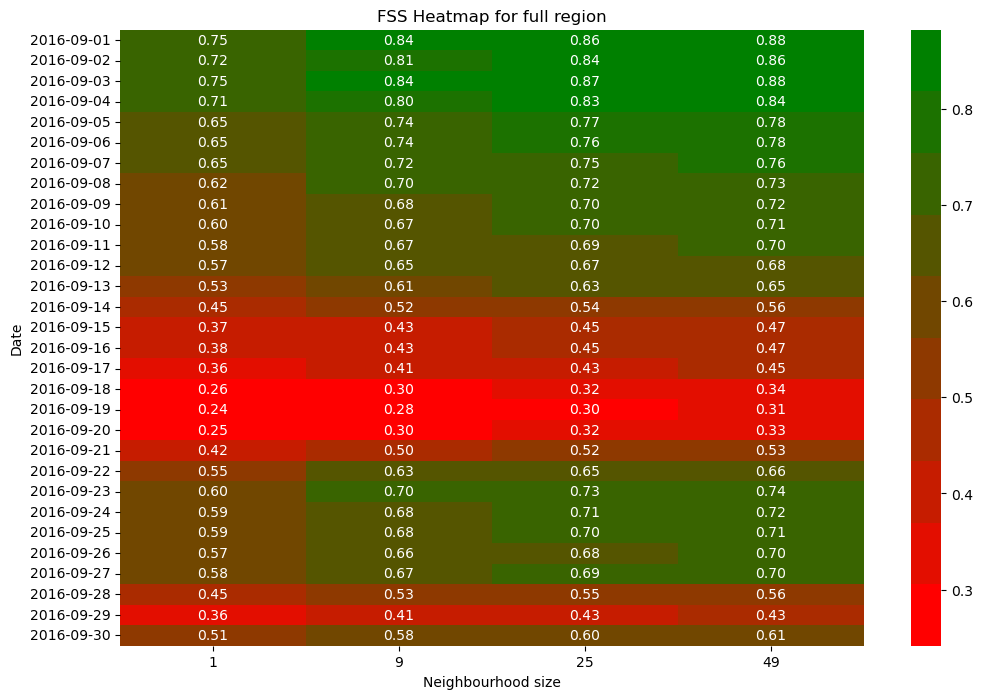

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
#cmap = "viridis"
#cmap = "coolwarm"

#pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title(f'FSS Heatmap for full region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()

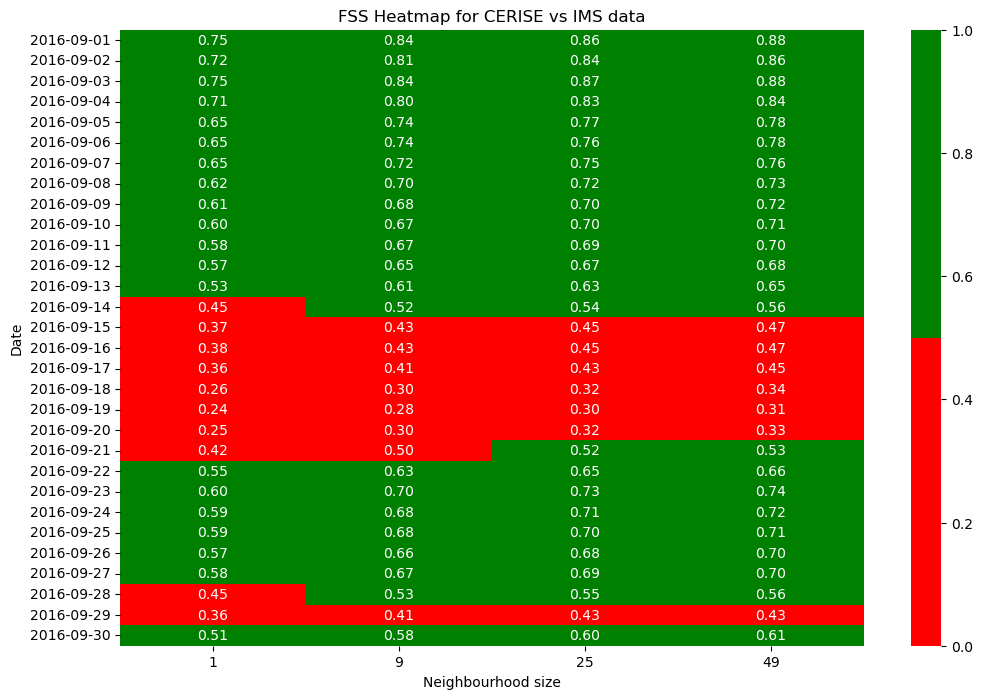

In [39]:
# make a reduced version

import matplotlib.colors as mcolors
# Create a custom colormap with red for values < 0.5 and green for values >= 0.5
colors = ['red', 'green']
n_bins = 2  # We only want two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create a mask for values >= 0.5
mask_high = pivot_df >= 0.5
mask_low = pivot_df < 0.5

# Plot the heatmap with custom colormap
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=custom_cmap,
            vmin=0, vmax=1,  # Set the range of values
            center=0.5)      # Set the center point for color transition

plt.title('FSS Heatmap for CERISE vs IMS data')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')
plt.savefig('fss_heatmap_cerise.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>